In [50]:
import numpy as np
import pandas as pd 
import random

3.141592653589793


In [54]:
def f_x(n):
    y_all = []
    noises = np.random.normal(0,0.004,n)
    random.shuffle(noises)
    deg = np.linspace(0,180,n)
    value_x = np.radians(deg)
    for x,noise in zip(value_x,noises):
        y = np.cos(2*(np.pi)*x) + x/(2*np.pi) + noise
        y_all.append(y)
    return value_x,y_all


In [57]:
x_all,y_all =  f_x(100)
print(y_all)

[0.9962928835621009, 0.986940974683471, 0.9359030866786376, 0.8411640576418338, 0.7177675362608481, 0.5745751668775957, 0.38984937646532747, 0.2153196283641951, 0.018704237813256776, -0.17405988910390882, -0.3640262016195092, -0.5244960365071403, -0.6714495926879118, -0.7845462702349314, -0.872125251181293, -0.9147524151878421, -0.9199695722502983, -0.8721747715627559, -0.8107589334781199, -0.7074157790931223, -0.566770606075129, -0.39794761886813734, -0.2155987922603861, -0.004398902769655131, 0.19431331334220833, 0.39888361079540785, 0.5898398658532479, 0.7569177670736948, 0.9017070470296024, 1.0291728861279348, 1.1035427351741407, 1.1474587952964854, 1.1580966661712, 1.1279376180811025, 1.0518258196481105, 0.9408696170500895, 0.810989537710918, 0.6465774263472921, 0.4664565070355448, 0.2829519423526008, 0.07820397950240307, -0.1094930043022057, -0.28712065067890863, -0.44441421762291594, -0.5712656002420139, -0.664376280443772, -0.7376077201023019, -0.7600105779713322, -0.7489842303

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline


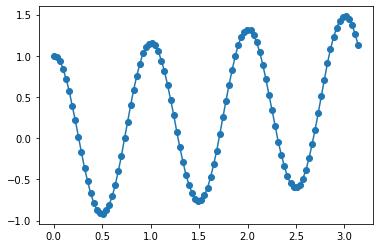

In [58]:
plt.scatter(x_all, y_all)
plt.plot(x_all, y_all)
